# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an ateempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

I am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given  clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, continue to pursue the project

## 4. Features
This is where different information about each of the features in the data. This was collated by doing my own research or talking to a subject matter expert (someone who knows about the data set)

## Data dictionary

- **age** — Age in years  
- **sex** — Sex (1 = male; 0 = female)  
- **cp** — Chest pain type:
  - 0: Typical angina — chest pain due to decreased blood supply to the heart
  - 1: Atypical angina — chest pain not related to heart
  - 2: Non‑anginal pain — typically esophageal spasms (non‑heart related)
  - 3: Asymptomatic — chest pain without clear disease signs
- **trestbps** — Resting blood pressure (mm Hg on admission). Values >130–140 may be concerning.  
- **chol** — Serum cholesterol (mg/dL). Approx: LDL + HDL + 0.2 * triglycerides. Values >200 may be concerning.  
- **fbs** — Fasting blood sugar > 120 mg/dL (1 = true; 0 = false). >126 mg/dL indicates diabetes.  
- **restecg** — Resting electrocardiographic results:
  - 0: Normal
  - 1: ST‑T wave abnormality (range: mild → severe)
  - 2: Possible/definite left ventricular hypertrophy
- **thalach** — Maximum heart rate achieved  
- **exang** — Exercise‑induced angina (1 = yes; 0 = no)  
- **oldpeak** — ST depression induced by exercise relative to rest (stress indicator)  
- **slope** — Slope of peak exercise ST segment:
  - 0: Upsloping (better response to exercise; uncommon)
  - 1: Flat (typical healthy)
  - 2: Downsloping (possible pathology)
- **ca** — Number of major vessels (0–3) visible on fluoroscopy (higher = more visible flow)  
- **thal** — Thallium stress test result:
  - 1, 3: Normal
  - 6: Fixed defect (old/stable)
  - 7: Reversible defect (stress‑induced impairment)
- **target** — Presence of heart disease (1 = disease, 0 = no disease)

#

## Preparing the tools

Use pandas, matplotlib and NumPy for data analysis and manipulation

In [81]:
# Import all the tools 

# EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# To have all the plots appear inside the notebook
%matplotlib inline 

# Model for Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform




# Load Data

In [82]:
# To load the data

data = pd.read_csv("data/heart-disease-UCI.csv")
data.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    1. What question(s) are you trying to solve?
    2. What kind of data do we have and how do we treat different types?
    3. What's missing from the data and how do you deal with it?
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or remove features to get more out of your data?

In [83]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [85]:
# Check how many counts of target are there

target_count = data["target"].value_counts()

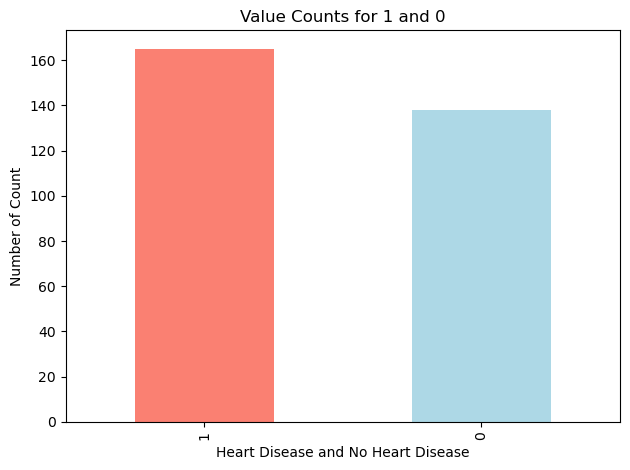

In [86]:
target_count.plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Value Counts for 1 and 0")
plt.xlabel("Heart Disease and No Heart Disease")
plt.ylabel("Number of Count")
plt.tight_layout()
plt.show()

In [87]:
# Look at information of the other columsn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [88]:
# Check if there is any missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
# Find out more information about the dataframe
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns

### Heart Disease Frequency according to sex

In [90]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [91]:
# Compare target columns with sex columns

# pd.crosstab(data["sex"], data["target"])
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,24,72
1,114,93


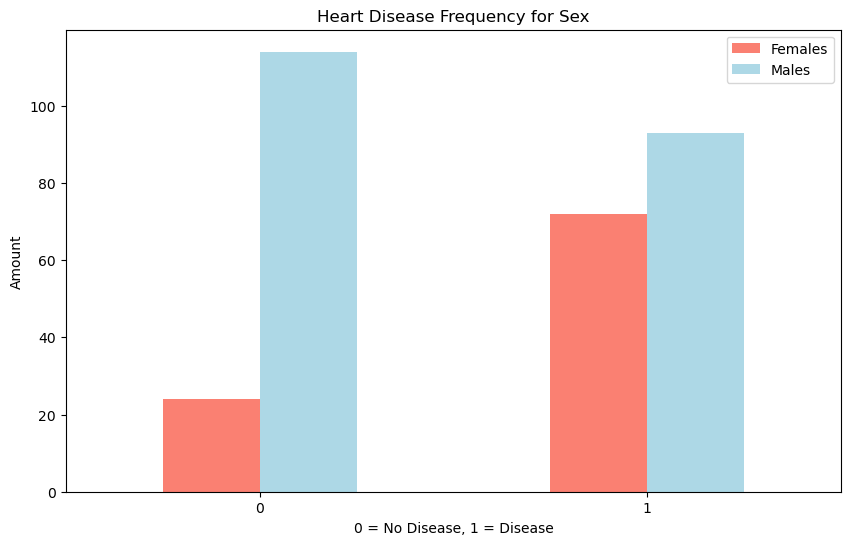

In [92]:
# To see the visual results with a bar
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                        color=["salmon", "lightblue"],
                                        figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(labels=["Females","Males"])
plt.xticks(rotation=0)
plt.tight_layout
plt.show()

## Age vs Max Heart Rate for Disease

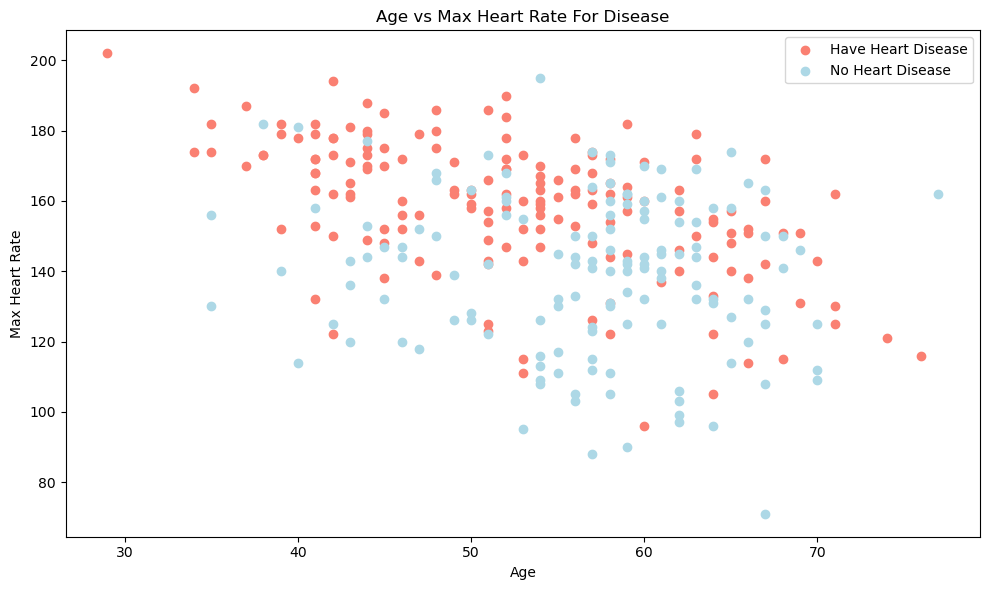

In [93]:
# Create the figure
plt.figure(figsize=(10, 6))

# Scatter plot with positive 
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           color="salmon",
           label="Have Heart Disease")

# Scatter plot with negative
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           color="lightblue",
           label="No Heart Disease")

plt.title("Age vs Max Heart Rate For Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.tight_layout()
plt.show()

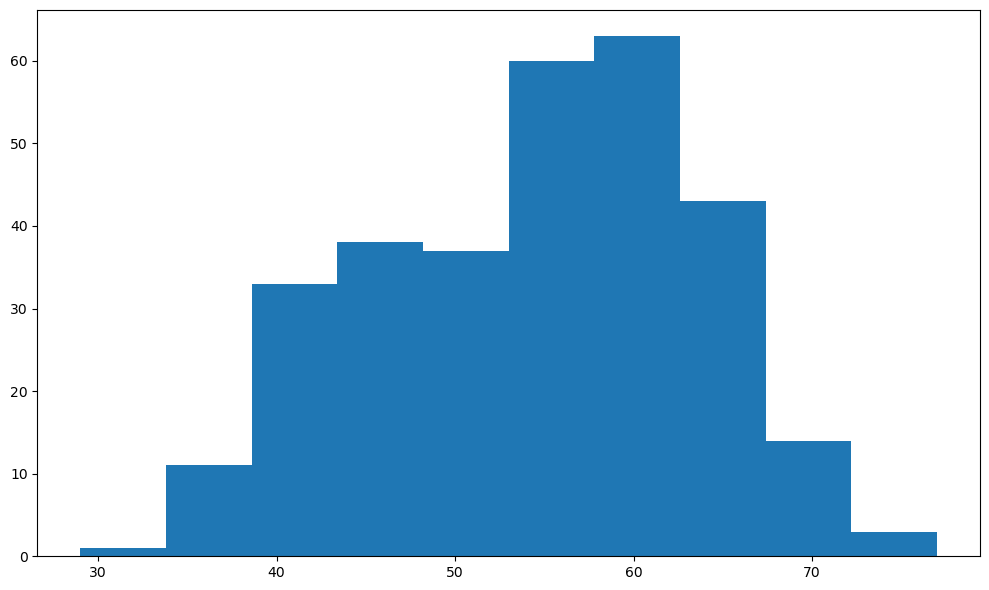

In [94]:
# Check the distribution of the age column with a histogram

plt.figure(figsize=(10,6))

plt.hist(data.age)
plt.tight_layout()
plt.show()

## Heart Disease frequency per chest pain type

    cp - Chest Pain Type:
        0: Typical angina (chest pain)
        1: Atypical angina (chest pain not related to heart)
        2: Non-anginal pain (typically esophageal spasms (non heart related)
        3: Asymptomatic (chest pain not showing signs of disease)

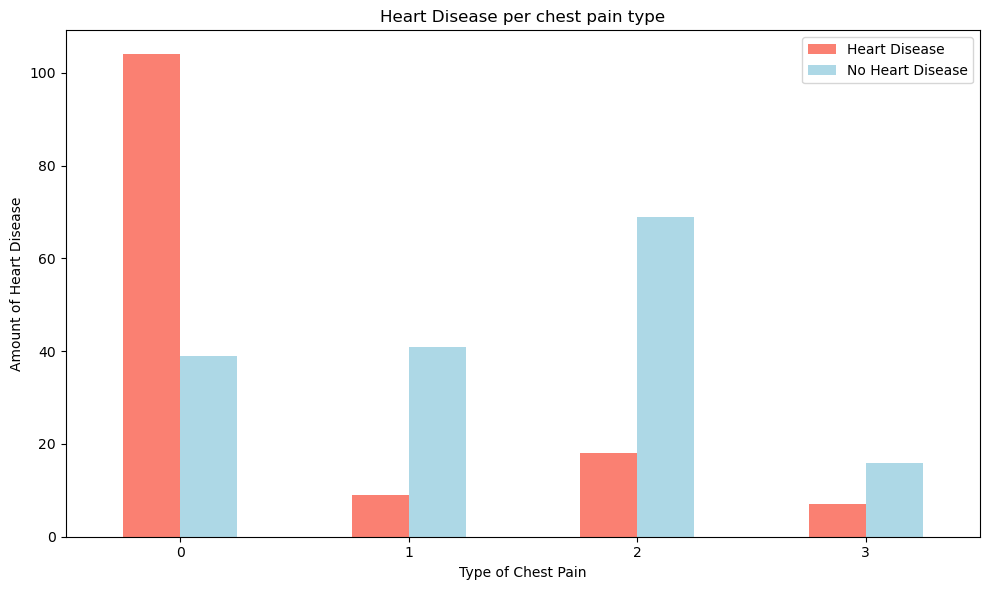

In [95]:
### Heart Disease frequence per chest pain type

pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      color=["salmon","lightblue"],
                                      figsize=(10,6))

plt.title("Heart Disease per chest pain type")
plt.xlabel("Type of Chest Pain")
plt.xticks(rotation=0)
plt.ylabel("Amount of Heart Disease")
plt.legend(labels=["Heart Disease", "No Heart Disease"])
plt.tight_layout()
plt.show()

In [96]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


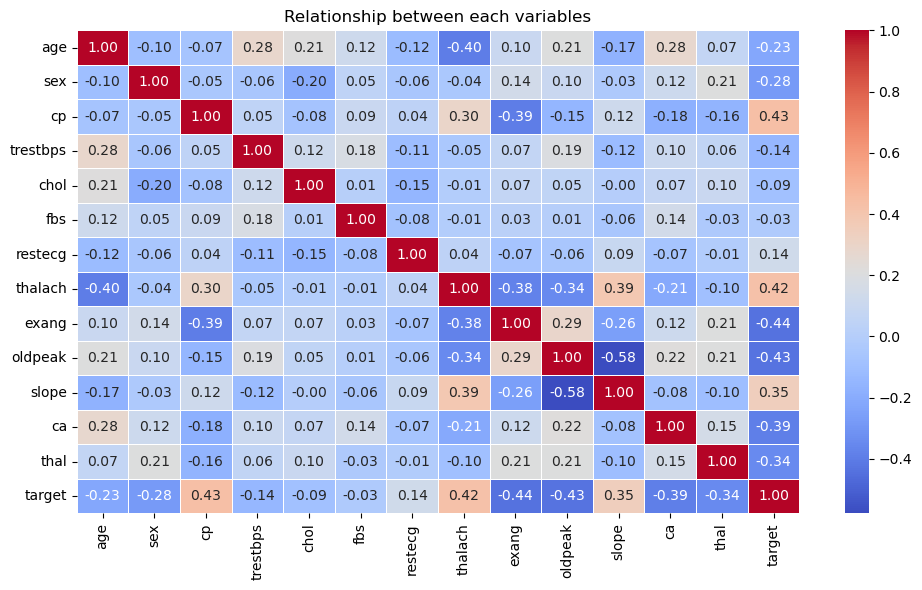

In [98]:
# Plotting out a correlation matrix to see how each variables interact with the other

correlation_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 cmap="coolwarm",
                 fmt=".2f",
                 linewidths=.5)

plt.title("Relationship between each variables")
plt.tight_layout()
plt.show()

# 5. Modelling

In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
# Split the data to X and y features
X = data.drop("target", axis=1)
y = data.target

In [101]:
# Split to 80-10-10 for training, validation and test split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.1,
                                                            random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                 y_train_val,
                                                 test_size=1/9,
                                                 random_state=42)

In [102]:
len(X_train), len(X_val), len(X_test)

(241, 31, 31)

In [103]:
len(data)

303

Now that the data split into training and test sets is ready, it's time to build a machine learning model.

I'll train it (find the patterns) on the training set.

And I'll validate it on the validation set before testing it on the test set.

We're going to try 3 different machine learning models:

    1.Logistic Regression
    2.K-Nearest Neighbours Classifier
    3.Random Forest Classifier

In [109]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression())
    ]),
    "K-Nearest Neighbours Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]),
    "Random Forest Classifier": RandomForestClassifier()
}

# Cross Val Score

print("--- Cross Validation Scores before fitting---")
for name, model in models.items():
    scores=cross_val_score(model, X, y, cv=5)
    print(f"{name} 5-fold CV accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

def evaluation_model(models, X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Evaluating the data with the 3 machine learning models:
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier
    """
    np.random.seed(42)  # for reproducibility

    # Dictionary to append model scores
    model_score = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        val_score   = model.score(X_val, y_val)
        test_score  = model.score(X_test, y_test)

        model_score[name] = {
            "train_score": train_score,
            "val_score": val_score,
            "test_score": test_score
        }

    return model_score

--- Cross Validation Scores before fitting---
Logistic Regression 5-fold CV accuracy: 0.835 ± 0.041
K-Nearest Neighbours Classifier 5-fold CV accuracy: 0.815 ± 0.051
Random Forest Classifier 5-fold CV accuracy: 0.802 ± 0.035


In [25]:
model_score = evaluation_model(models=models,
                               X_train=X_train,
                               X_val=X_val,
                               X_test=X_test,
                               y_train=y_train,
                               y_val=y_val,
                               y_test=y_test)
model_score

/Users/axlee/Desktop/Heart_Disease_Classification/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'train_score': 0.8589211618257261,
  'val_score': 0.8064516129032258,
  'test_score': 0.8064516129032258},
 'K-Nearest Neighbours Classifier': {'train_score': 0.7676348547717843,
  'val_score': 0.7419354838709677,
  'test_score': 0.6451612903225806},
 'Random Forest Classifier': {'train_score': 1.0,
  'val_score': 0.8064516129032258,
  'test_score': 0.8064516129032258}}


## Model Comparison

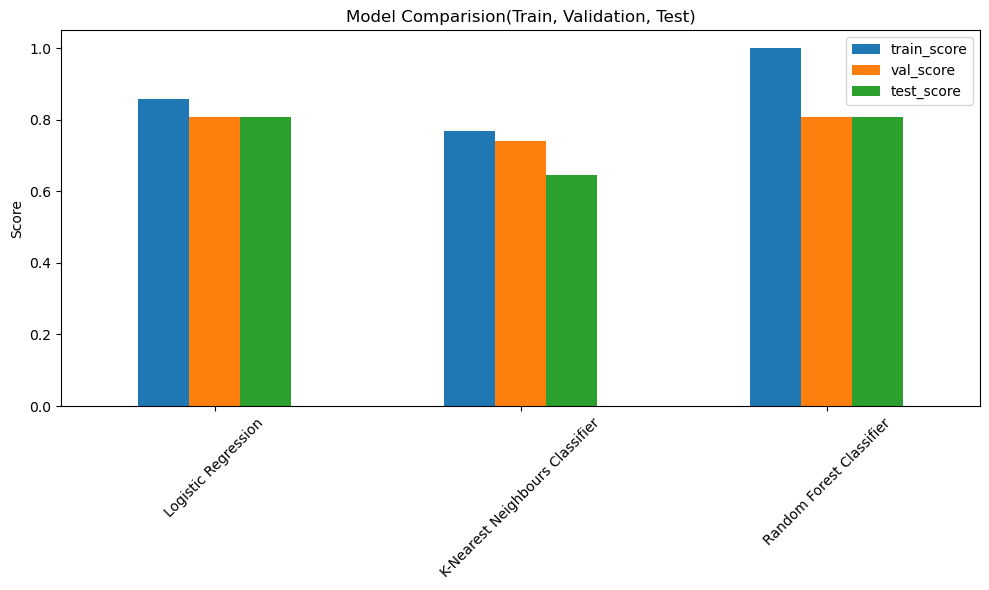

In [78]:
scores_df = pd.DataFrame(model_score).T
scores_df.plot(kind="bar",
               figsize=(10,6))

plt.title("Model Comparision(Train, Validation, Test)")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.tight_layout()
plt.show()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

    Hypyterparameter tuning - All Models
    Feature importance - All Models
    Confusion matrix - Classification
    Cross-validation - Classification
    Precision - Classification
    Recall - Classification
    F1 score - Classification
    Classification report - Classification
    ROC curve - Classification
    Area under the curve (AUC) - Classification

## Hyperparameter Tuning

In [119]:
# Tuning KNN

train_score = []
test_score = []

# Adjust neighbours
neighbours = range(1,21)

# Instantiate Model

for i in neighbours:
    pipe=Pipeline([
        ("scaler",StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=i))
    ])
    pipe.fit(X_train, y_train)
    train_score.append(pipe.score(X_train, y_train))
    test_score.append(pipe.score(X_test, y_test))

train_score

[1.0,
 0.9004149377593361,
 0.8921161825726142,
 0.8879668049792531,
 0.9004149377593361,
 0.8921161825726142,
 0.8921161825726142,
 0.8921161825726142,
 0.8755186721991701,
 0.8755186721991701,
 0.8838174273858921,
 0.8796680497925311,
 0.8630705394190872,
 0.8796680497925311,
 0.8672199170124482,
 0.8672199170124482,
 0.8464730290456431,
 0.8589211618257261,
 0.8506224066390041,
 0.8589211618257261]

In [120]:
test_score

[0.7741935483870968,
 0.7741935483870968,
 0.8064516129032258,
 0.8064516129032258,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8064516129032258,
 0.8064516129032258,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.8064516129032258,
 0.8064516129032258,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549]

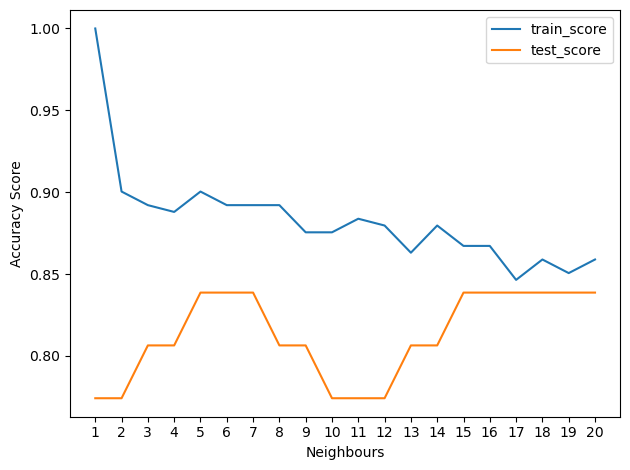

Maximum KNN score on the test data: 83.87%
Best amounts of KNN Neighbors on the test data: 5


In [121]:
plt.plot(neighbours, train_score, label="train_score")
plt.plot(neighbours, test_score, label="test_score")
plt.xticks(range(1,21,1))
plt.xlabel("Neighbours")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

# Show the best index 
best_index = np.argmax(test_score)
best_k = neighbours[best_index]

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")
print(f"Best amounts of KNN Neighbors on the test data: {best_k}")


## Hyperparameter Tuning with RandomizedSearchCV for Logistic Regression and RandomForestClassifier

In [122]:
# Parameters for Logistic Regression

logr_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

logr_params = {
    "logreg__solver": ["liblinear"],
    "logreg__C": np.logspace(-3, 3, 50),
}

In [123]:
# Set Random Seed
np.random.seed(42)

# Turning with RandomizedSearchCV
logr_rs = RandomizedSearchCV(
    estimator=logr_pipe,
    param_distributions=logr_params,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

# Fit random hyperparamter search model for Logisitic Regression
logr_rs.fit(X_train, y_train)

# Best parameters
logr_best_params = logr_rs.best_params_
print(f"Best Params: {logr_best_params}")

# Best cross-validation score
logr_cv_score = logr_rs.best_score_
print(f"Best CV Score: {logr_cv_score}")

# Score on Validation Set
logr_val_score = logr_rs.score(X_val, y_val)
print(f"Best Validation Score: {logr_val_score}")

# Score on Testing Set
logr_test_score = logr_rs.score(X_test, y_test)
print(f"Best Testing Score: {logr_test_score}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'logreg__solver': 'liblinear', 'logreg__C': np.float64(0.029470517025518096)}
Best CV Score: 0.842517006802721
Best Validation Score: 0.7741935483870968
Best Testing Score: 0.8387096774193549


In [124]:
# Parameters for Random Forest Tuning

rfc_params = {
    "n_estimators":randint(50,500),
    "max_depth":randint(1,20),
    "min_samples_split":randint(2,10),
    "min_samples_leaf":randint(1,4)
}

In [ ]:
# Tuning Random Forest Classifier

# Set Random Seed
np.random.seed(42)

# Turning with RandomizedSearchCV
rfc = RandomizedSearchCV(estimator=RandomForestClassifier(),
                        param_distributions=rfc_params,
                         n_iter=100,
                         cv=5,
                         scoring="accuracy",
                         random_state=42,
                         n_jobs=-1,
                        verbose=1)

# Fit model to training data
rfc.fit(X_train, y_train)

# Best parameters
rfc_best_params = rfc.best_params_
print(f"Best Testing Score: {rfc_best_params}")

# Best cross validation
rfc_cv_score = rfc.best_score_
print(f"Best CV Score: {rfc_cv_score}")

# Best validation score
rfc_val_score = rfc.score(X_val, y_val)
print(f"Best validation score: {rfc_val_score}")

# Best test score
rfc_test_score = rfc.score(X_test, y_test)
print(f"Best testing score: {rfc_test_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits



## Hyperparamter Tuning with GridSearchCV

In [ ]:
# Using RandromForstClassifier, will tune with GridSearchCV
# Do not use randint as GSV needs explict list of values

grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 4, 6, 8, 10, 12],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2", 0.6, 0.8]
}

In [ ]:
# Set random seed
np.random.seed(42)

# Instantiate the GridSearchCV Object
grid_rf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=grid,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# Fit the Object to the training set
grid_rf.fit(X_train, y_train)

# Best param
grid_rf_best_params = grid_rf.best_params_
print(f"Best parameter with GridSearchCV: {grid_rf_best_params}")

# Best cross validation score
grid_rf_best_score = grid_rf.best_score_
print(f"Best CV score: {grid_rf_best_score}")

# Validation Score
grid_rf_val_score = grid_rf.score(X_val, y_val)
print(f"Best CV score: {grid_rf_val_score}")

# Testing Score
grid_rf_test_score = grid_rf.score(X_test, y_test)
print(f"Best CV score: {grid_rf_test_score}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameter with GridSearchCV: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Best CV score: 0.8507653061224489
Best CV score: 0.8064516129032258
Best CV score: 0.8064516129032258


# Evaluting our tuned machine learning classifier, beyond accuracy


    ROC curve and AUC score
    Confusion matrix
    Classification report
    Precision
    Recall
    F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

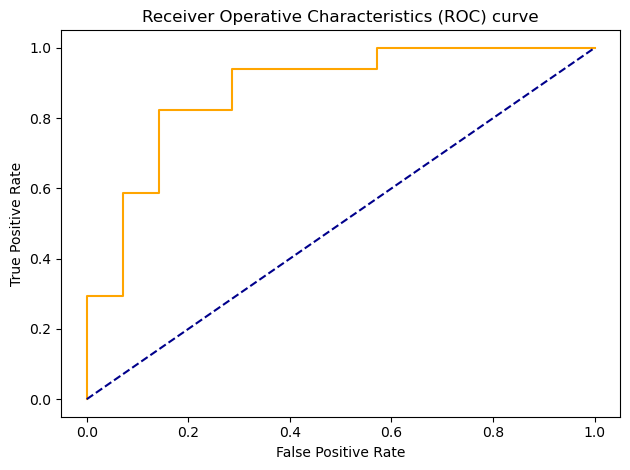

AUC: 0.878


In [ ]:
# ROC Curve

np.random.seed(42)

# Instantiate RandomForestCurve with best params
clf =  RandomForestClassifier(n_estimators=100,
                                max_depth=4,
                                max_features= "sqrt",
                                min_samples_leaf=1,
                                min_samples_split=6,
                                random_state=42)

# Fit clf to the training data
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_positive_probs = y_probs[:,1]

# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_positive_probs)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,
             tpr,
             color="orange",
             label="ROC")
    plt.plot([0,1],
            [0,1],
            color="darkblue",
            linestyle="--",
            label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operative Characteristics (ROC) curve")
    plt.tight_layout()
    plt.show()

plot_roc_curve(fpr, tpr)

# To see AUC Score
auc = roc_auc_score(y_test, y_positive_probs)
print(f"AUC: {auc:.3f}")

# Creating Confusion Matrix

In [ ]:
y_preds = clf.predict(X_test)
# confusion_matrix(y_test, y_preds)
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,10,4
1,2,15


<Figure size 1000x600 with 0 Axes>

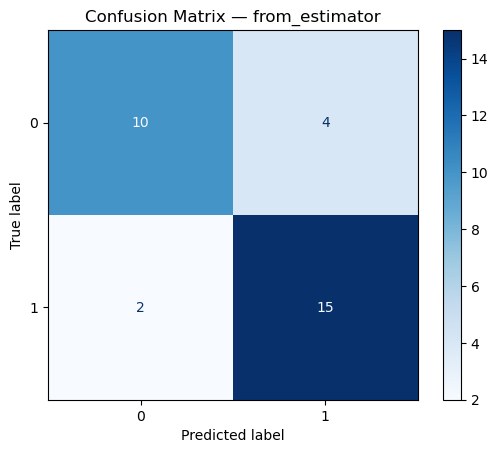

In [ ]:
def Confusion_Matrix_Display(y_test, y_preds):
    plt.figure(figsize=(10,6))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                          display_labels=[0,1],
                                          cmap="Blues",
                                          normalize=None)
    plt.title("Confusion Matrix — from_estimator")
    plt.show()

Confusion_Matrix_Display(y_test, y_preds)

# Classification Report

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.79      0.88      0.83        17

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



# Evaluating the model

In [ ]:
# Custom function to do evaluation

def evaluate_predictions(y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    print(f"Accuracy Score: {accuracy *100:.2f}%")
    print(f"Precision Score: {precision*100:.2f}%")
    print(f"Recall Score: {recall*100:.2f}%")
    print(f"f1 Score: {f1*100:.2f}%")


In [ ]:
# Evaluating validation set

y_preds = clf.predict(X_val)
print("--- Evaluation of Validation Test Set ---")
evaluate_predictions(y_val, y_preds)


--- Evaluation of Validation Test Set ---
Accuracy Score: 80.65%
Precision Score: 80.95%
Recall Score: 89.47%
f1 Score: 85.00%


In [ ]:
# Evaluating Test set

y_preds = clf.predict(X_test)
print("--- Evaluation of Test Set ---")
evaluate_predictions(y_test, y_preds)

--- Evaluation of Test Set ---
Accuracy Score: 80.65%
Precision Score: 78.95%
Recall Score: 88.24%
f1 Score: 83.33%


# Trying out feature importance


Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandeomForestClassifier model...


In [ ]:
print(f"model score on training data: {clf.score(X_train, y_train)}")
print(f"model score on testing data: {clf.score(X_test, y_test)}")

model score on training data: 0.921161825726141
model score on testing data: 0.8064516129032258


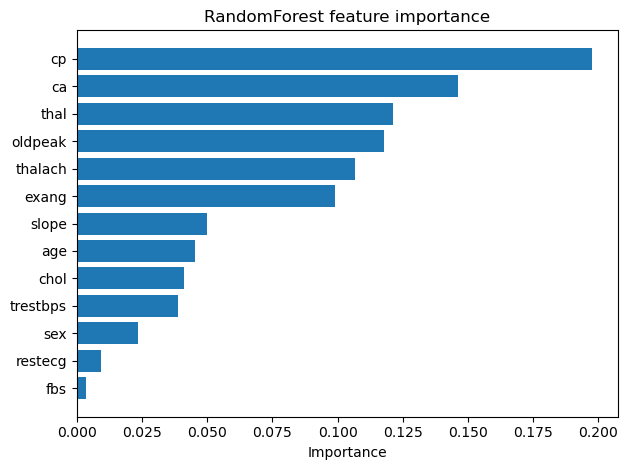

In [ ]:
importances = clf.feature_importances_

indices=np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title("RandomForest feature importance")
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()